<a href="https://colab.research.google.com/github/m-and-ms/Question-Clustering-/blob/master/Pos_tfidf_Question_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install mglearn

     |████████████████████████████████| 542kB 3.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.8-py2.py3-none-any.whl size=582647 sha256=ecea663680f38d8d0eea12e5249ef05e5d6849b6fae589ee1e1b9cde9dad4de0
  Stored in directory: /root/.cache/pip/wheels/47/b8/58/ce0c4be41f4efbfb8773eb72782164dbb758685d12ef2732f5
Successfully built mglearn


In [0]:
from nltk.corpus import treebank
from nltk.tag.sequential import ClassifierBasedPOSTagger
import json

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import KMeans
import re
import nltk
import matplotlib.cm as cm
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import mglearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import itertools
import matplotlib.pyplot as plt
from sklearn import  decomposition

In [0]:

questions=[]
with open('WebQSP.train.json') as json_file:
    data = json.load(json_file)
    for question in data['Questions'] :
         questions.append(question['ProcessedQuestion'])

In [0]:
import nltk
nltk.download('punkt')
import re 
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

stemmer = SnowballStemmer("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'ag

NameError: ignored

In [0]:
from nltk.corpus import stopwords
stops = list(stopwords.words("english"))
stops.extend( ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

def clean(text):
    
    tokens = nltk.word_tokenize(text)
    
    
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) >= 3 :
        
            
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    words = [w.lower() for w in filtered_tokens if not w in stops]
    return " ".join(words)

In [0]:
clean(questions[1])

'character natalie portman play star wars'

In [0]:
questions=[clean(q)for q in questions]

In [0]:
len(questions)

3098

In [0]:
questions

['name justin bieber brother',
 'character natalie portman play star wars',
 'country grand bahama island',
 'kind money take bahamas',
 'character john noble play lord rings',
 'joakim noah play',
 'nfl redskins',
 'saki live',
 'old sacha baron cohen',
 'time zone cleveland ohio',
 'draco malloy end marrying',
 'countries border',
 'rome italy located map',
 'nina dobrev nationality',
 'kennedy died first',
 'books beverly cleary right',
 'fly bali',
 'prime minister ethiopia',
 'see near sedona arizona',
 'high school president bill clinton attend',
 'form government russia today',
 'movies taylor lautner play',
 'year lebron james came nba',
 'wife king henry behead',
 'ishmael mom',
 'malcolm trying accomplish',
 'netherlands world map',
 'president brazil',
 'major cities france',
 'city esther live',
 'sport toronto maple leafs play',
 'saint nicholas known',
 'cher son name',
 'party andrew jackson',
 'county city hampton',
 'name first harry potter novel',
 'william shakespear

In [0]:
train_sents = treebank.tagged_sents()

NameError: ignored

In [0]:
train_sents.index

<bound method AbstractLazySequence.index of [[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]>

In [0]:
len(train_sents)

3914

In [0]:
tagger = ClassifierBasedPOSTagger(train=train_sents)
stemmer = SnowballStemmer('english')

In [0]:



def count_nouns(taged_tokens):
    n = sum(1 for word, tag in taged_tokens if tag == 'NN' or tag == 'NNS' \
            or tag == 'NNP' or tag == 'NNP')
    return n


def count_adjectives(taged_tokens):
    n = sum(1 for word, tag in taged_tokens if tag == 'JJ' or tag == 'JJR' or tag == 'JJS')
    return n


def count_tagged(taged_tokens, tag_in):
    n = sum(1 for word, tag in taged_tokens if tag == tag_in)
    return n


def is_past_tense(taged_tokens):
    n = sum(1 for word, tag in taged_tokens if tag == 'VBD')
    return (n > 0)








def first_tag(taged_tokens):
    return str(taged_tokens[0][1])


def second_tag(taged_tokens):
    if len(taged_tokens) > 1:
        return str(taged_tokens[1][1])
    else:
        return False


def third_tag(taged_tokens):
    if len(taged_tokens) > 2:
        return str(taged_tokens[2][1])
    else:
        return False






In [0]:
def get_sentence_features(sentens_in):
    stemmed_words = list()
    for w in sentens_in.split():
        stemmed_words.append(stemmer.stem(w))

    sentence = ' '.join(stemmed_words)
    word_tokens = nltk.wordpunct_tokenize(sentence)

    taged_tokens = tagger.tag(word_tokens)
   
    X_dict = {}



 

 
   
    X_dict['count_nouns'] = count_nouns(taged_tokens)
    X_dict['count_adjectives'] = count_adjectives(taged_tokens)

    X_dict['count_numbers'] = count_tagged(taged_tokens, 'CD')
    X_dict['count_NNS'] = count_tagged(taged_tokens, 'NNS')
    X_dict['count_NNP'] = count_tagged(taged_tokens, 'NNP')
    X_dict['count_NNPS'] = count_tagged(taged_tokens, 'NNPS')
    X_dict['count_RBS'] = count_tagged(taged_tokens, 'RBS')
    X_dict['count_RBR'] = count_tagged(taged_tokens, 'RBR')
    X_dict['count_WP'] = count_tagged(taged_tokens, 'WP')
    X_dict['count_WP$'] = count_tagged(taged_tokens, 'WP$')
    X_dict['count_WRB'] = count_tagged(taged_tokens, 'WRB')
    X_dict['count_PRP'] = count_tagged(taged_tokens, 'PRP')
    X_dict['count_POS'] = count_tagged(taged_tokens, 'POS')
    X_dict['count_FW'] = count_tagged(taged_tokens, 'FW')
    X_dict['count_VB'] = count_tagged(taged_tokens, 'VB')
    X_dict['count_VBD'] = count_tagged(taged_tokens, 'VBD')
    X_dict['count_VBG'] = count_tagged(taged_tokens, 'VBG')
    X_dict['count_VBN'] = count_tagged(taged_tokens, 'VBN')
    X_dict['count_CC'] = count_tagged(taged_tokens, 'CC')

    X_dict['count_DT']         = count_tagged(taged_tokens, 'DT')
    X_dict['count_UH']         = count_tagged(taged_tokens, 'UH')
    X_dict['count_SYM']        = count_tagged(taged_tokens, 'SYM')
    X_dict['count_PDT']        = count_tagged(taged_tokens, 'PDT')
    X_dict['count_LS']         = count_tagged(taged_tokens, 'LS')

    X_dict['count_3rd person'] = count_tagged(taged_tokens, 'VBZ')
    X_dict['count_gerund'] = count_tagged(taged_tokens, 'VBG')


    

  
    









    return X_dict


In [0]:
get_sentence_features(questions[3])

{'count_3rd person': 0,
 'count_CC': 1,
 'count_DT': 1,
 'count_FW': 0,
 'count_LS': 0,
 'count_NNP': 0,
 'count_NNPS': 0,
 'count_NNS': 0,
 'count_PDT': 0,
 'count_POS': 0,
 'count_PRP': 0,
 'count_RBR': 0,
 'count_RBS': 0,
 'count_SYM': 0,
 'count_UH': 0,
 'count_VB': 1,
 'count_VBD': 0,
 'count_VBG': 0,
 'count_VBN': 0,
 'count_WP': 0,
 'count_WP$': 0,
 'count_WRB': 0,
 'count_adjectives': 0,
 'count_gerund': 0,
 'count_nouns': 1,
 'count_numbers': 0,
 'first_tag': 'CC',
 'second_tag': 'NN',
 'third_tag': 'VB'}

In [0]:
question_dicts=[get_sentence_features(question) for question in questions]

In [0]:
print(question_dicts)

[{'count_nouns': 1, 'count_adjectives': 2, 'count_numbers': 0, 'count_NNS': 0, 'count_NNP': 0, 'count_NNPS': 0, 'count_RBS': 0, 'count_RBR': 0, 'count_WP': 0, 'count_WP$': 0, 'count_WRB': 0, 'count_PRP': 0, 'count_POS': 0, 'count_FW': 0, 'count_VB': 0, 'count_VBD': 0, 'count_VBG': 0, 'count_VBN': 0, 'count_CC': 0, 'count_DT': 0, 'count_UH': 0, 'count_SYM': 0, 'count_PDT': 0, 'count_LS': 0, 'count_3rd person': 0, 'count_gerund': 0, 'first_tag': 'NN', 'second_tag': 'IN', 'third_tag': 'JJR'}, {'count_nouns': 1, 'count_adjectives': 1, 'count_numbers': 0, 'count_NNS': 0, 'count_NNP': 0, 'count_NNPS': 0, 'count_RBS': 0, 'count_RBR': 1, 'count_WP': 0, 'count_WP$': 0, 'count_WRB': 0, 'count_PRP': 1, 'count_POS': 0, 'count_FW': 0, 'count_VB': 1, 'count_VBD': 0, 'count_VBG': 0, 'count_VBN': 0, 'count_CC': 0, 'count_DT': 0, 'count_UH': 0, 'count_SYM': 0, 'count_PDT': 0, 'count_LS': 0, 'count_3rd person': 0, 'count_gerund': 0, 'first_tag': 'NN', 'second_tag': 'PRP', 'third_tag': 'MD'}, {'count_nou

In [0]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
v = DictVectorizer(sparse=False)

In [0]:
X=v.fit_transform(question_dicts)
X.shape

(3098, 110)

In [0]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
       
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    


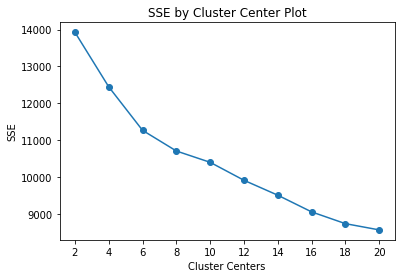

In [0]:
from numpy import unique
from numpy import where



find_optimal_clusters(X,20)  

In [0]:
num_clusters = 8
kmeans = MiniBatchKMeans(n_clusters=num_clusters)
kmeans.fit(X)
labels =kmeans.labels_

In [0]:
cm = plt.get_cmap('gist_rainbow')
cm(1)

(1.0, 0.0, 0.13908496732026143, 1.0)

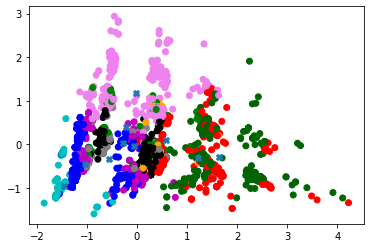

In [0]:
colors =['orange','blue','green','red','violet','black','gray','darkgreen','c','m','y','brown','indigo','crimson','peru','peachpuff','yellow','lime','darkred','skyblue']
color_labels=[colors[label] for label in labels ]
pca= decomposition.PCA(n_components=2).fit(X)
coords=pca.transform(X)

plt.scatter(coords[:,0],coords[:,1],c=color_labels)
centroids=kmeans.cluster_centers_

centroidcoords=pca.transform(centroids)
plt.scatter(centroidcoords[:,0],centroidcoords[:,1],marker='X')
plt.show()

In [0]:
def get_percentage_dict(labels,max_):

  type_dict={}
  for i in range(max_):

  
     percentage =( np.count_nonzero(labels == i))/3098
     type_dict['Cluster'+str(i)]=(( np.count_nonzero(labels == i)),percentage)
  return type_dict


In [0]:
get_percentage_dict(labels,8)

{'Cluster0': (655, 0.21142672692059394),
 'Cluster1': (390, 0.12588766946417043),
 'Cluster2': (471, 0.15203357004519044),
 'Cluster3': (364, 0.11749515816655907),
 'Cluster4': (428, 0.1381536475145255),
 'Cluster5': (208, 0.0671400903808909),
 'Cluster6': (82, 0.02646868947708199),
 'Cluster7': (500, 0.16139444803098774)}

In [0]:

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(questions)


In [0]:
X_tfidf.shape

(3098, 2839)

In [0]:
X_tfidf.toarray()[:,2]

array([0., 0., 0., ..., 0., 0., 0.])

In [0]:
Combined_feats=np.concatenate((X ,X_tfidf.toarray()),axis=1)

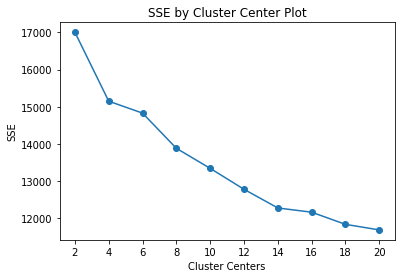

In [0]:
find_optimal_clusters(Combined_feats, 20)

In [0]:

kmeans_combined = MiniBatchKMeans(n_clusters=14)
kmeans_combined.fit(Combined_feats)
labels_combined =kmeans_combined.labels_

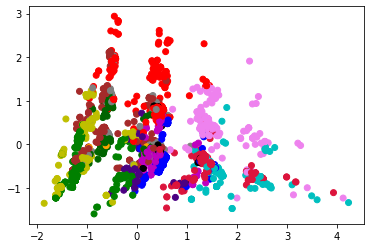

In [0]:
def plot_pca(data, labels):
    max_label = max(labels)
    colors =['orange','blue','green','red','violet','black','gray','darkgreen','c','m','y','brown','indigo','crimson','peru','peachpuff','yellow','lime','darkred','skyblue']
    


    color_labels=[colors[label] for label in labels ]
    pca= decomposition.PCA(n_components=2).fit(data)
    coords=pca.transform(data)

    plt.scatter(coords[:,0],coords[:,1],c=color_labels)

    plt.show()
    
  
    

    

    
plot_pca(Combined_feats, labels_combined)

In [0]:
get_percentage_dict(labels_combined,14)

{'Cluster0': (167, 0.0539057456423499),
 'Cluster1': (181, 0.05842479018721756),
 'Cluster10': (505, 0.16300839251129762),
 'Cluster11': (87, 0.028082633957391866),
 'Cluster12': (120, 0.03873466752743705),
 'Cluster13': (253, 0.08166559070367979),
 'Cluster2': (228, 0.07359586830213041),
 'Cluster3': (205, 0.06617172369270496),
 'Cluster4': (179, 0.05777921239509361),
 'Cluster5': (374, 0.12072304712717882),
 'Cluster6': (414, 0.13363460296965785),
 'Cluster7': (128, 0.04131697869593286),
 'Cluster8': (174, 0.05616526791478373),
 'Cluster9': (83, 0.026791478373143964)}